In [1]:
import nu_smrutils as u
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
%matplotlib notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
filename='datasets/aBNCI2014004R.pickle'
d = u.loaddat(filename)
df=d[0].to_data_frame()
subjects=len(d)
print('Subjects: '+str(subjects))
print('Channels: '+str(df.columns.to_list()[3:]))
print('Total epochs: '+str(len(df['epoch'].unique())))
print('Points per epoch: ' + str(df.loc[df['epoch']==1,:].shape[0]))

Subjects: 9
Channels: ['C3', 'Cz', 'C4']
Total epochs: 720
Points per epoch: 321


In [3]:
def produce_coordinates(d, subject, l_epoch, r_epoch, sampling, t, channels):
    data=d[subject].to_data_frame()
    data=data[['time','condition','epoch']+channels]
    left_hand=data.loc[data['condition']=="left_hand", :]
    right_hand=data.loc[data['condition']=='right_hand',:]
    l_epochs=left_hand['epoch'].unique()
    r_epochs=right_hand['epoch'].unique()
    times=data['time'].unique()    
    right, left = [], []
    for c in channels:
        right.append(right_hand.loc[(right_hand['epoch']==r_epochs[r_epoch])&(right_hand['time']>=times[t[0]])&(right_hand['time']<=times[t[-1]]),:][c].to_list()[::sampling])
        left.append(left_hand.loc[(left_hand['epoch']==l_epochs[l_epoch])&(left_hand['time']>=times[t[0]])&(left_hand['time']<=times[t[-1]]),:][c].to_list()[::sampling])
    return right, left

<IPython.core.display.Javascript object>


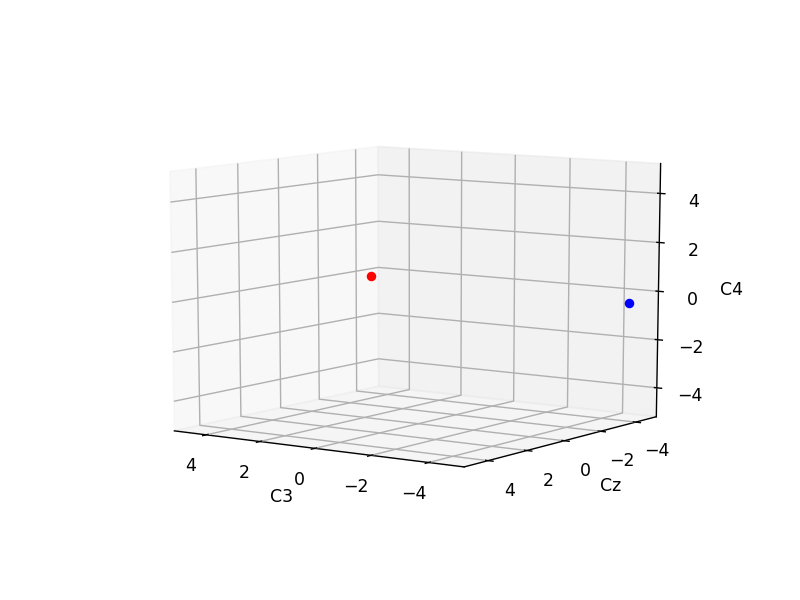

In [16]:
params={
    'subject':2,
    'l_epoch':5, #0-359
    'r_epoch':5, #0-359
    'sampling':1, 
    't':[0], #0-320
    'channels':['C3','Cz','C4'] #up to 3, order is x y z
}

fig=plt.figure()
ax=fig.add_subplot(1,1,1, projection='3d')
ax.view_init(elev=10, azim=125)

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)

ax.set_xlabel(params['channels'][0])
ax.set_ylabel(params['channels'][1])
ax.set_zlabel(params['channels'][2])

right, left = produce_coordinates(d, **params)
## Right hand -- red
## Left hand == blue
ax.scatter(right[0], right[1], right[2], marker='o', color='red')
ax.scatter(left[0], left[1], left[2], marker='o', color='blue')
plt.show()

In [ ]:
params2={
    'l_epoch':34, 
    'r_epoch':2, 
    'sampling':1, 
    't':[50],
    'channels':['C3','Cz','C4']
}

fig=plt.figure()
axes=[]
for i in range(subjects):
    ax=fig.add_subplot(3,3,i+1,projection='3d')
    ax.set_xlabel(params2['channels'][0])
    ax.set_ylabel(params2['channels'][1])
    ax.set_zlabel(params2['channels'][2])
    ax.view_init(elev=10, azim=125)
    right, left = produce_coordinates(d, i, **params2)
    ax.scatter(right[0], right[1], right[2], marker='o', color='red')
    ax.scatter(left[0], left[1], left[2], marker='o', color='blue')
    axes.append(ax)

plt.show()    

In [38]:
params3={
    'subject':2,
    'l_epoch':5, #0-359
    'r_epoch':5, #0-359
    'sampling':1, 
    't':[0,100], #0-320
    'channels':['C3','Cz','C4'] #up to 3, order is x y z
}
right, left = produce_coordinates(d, **params3)

def update(frame, points):
    graph.set_data(points[0][frame], points[1][frame])
    graph.set_3d_properties((points[2][frame]))
    

<IPython.core.display.Javascript object>


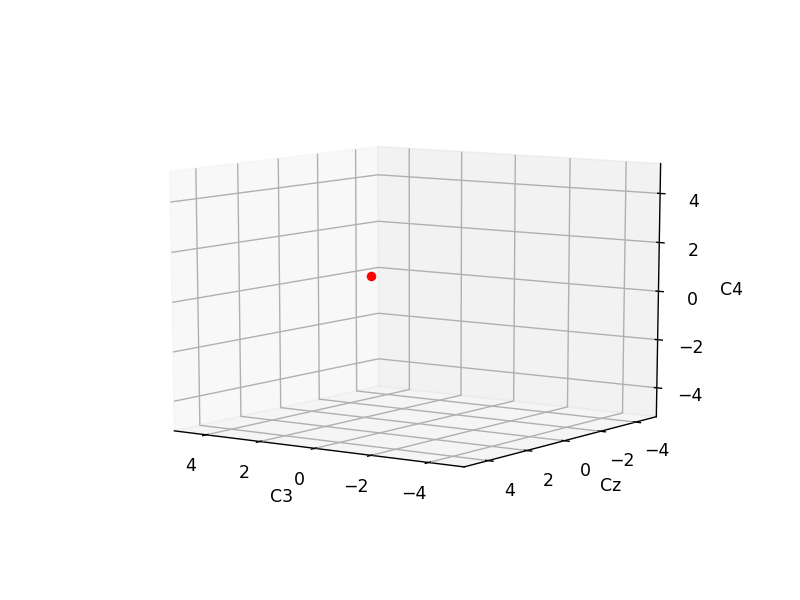

In [39]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=125)
ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
ax.set_xlabel(params3['channels'][0])
ax.set_ylabel(params3['channels'][1])
ax.set_zlabel(params3['channels'][2])

graph=ax.scatter(right[0][0], right[1][0], right[2][0], marker='o', color='red')
ani = animation.FuncAnimation(fig, update, 20, fargs=(right), interval=200, blit=False)
plt.show()

<IPython.core.display.Javascript object>


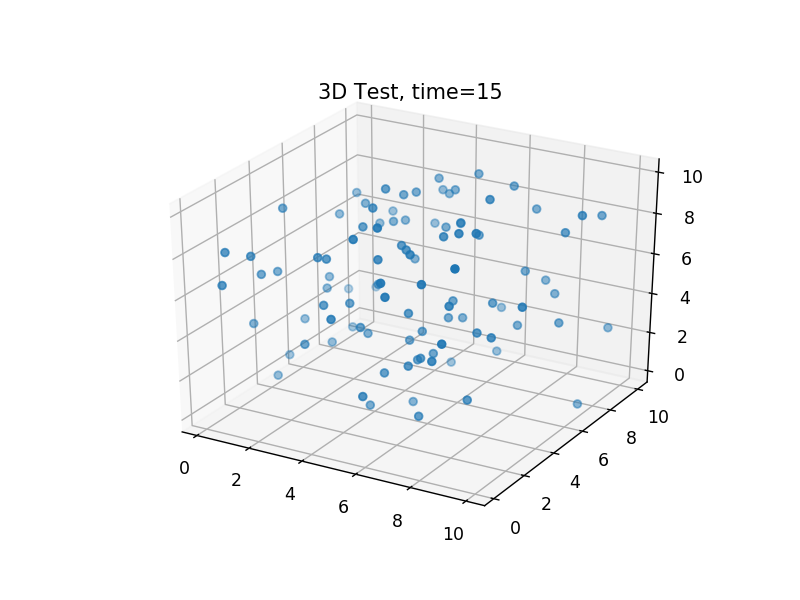

In [36]:
a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})
def update_graph(num):
    data=df[df['time']==num]
    graphr._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graphr = ax.scatter(data.x, data.y, data.z)

ani = animation.FuncAnimation(fig, update_graph, 19, 
                               interval=200, blit=False)

plt.show()